# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [5]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# grupos de amigos de diferentes tamanhos
galera = np.arange(3,15)

Na versão anterior, usávamos vários dicionários pra guardar as informações relevantes.
Com o pandas podemos guardar num único DataFrame (atenção ao resultado = resultado.append() pra guardar)
e depois usar os recursos do DataFrame como groupby para calcular estatísticas para as rodadas.

In [7]:
# guardar informacao de convergencia para cada grupo de amigos
resultado = pd.DataFrame()
# precisamos varias interacoes pra ver o comportamento
numero_interacoes = 50
# testa convergencia para cada grupo de amigos
for amigos in galera:
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print amigos, i,'converge'
                resultado = resultado.append(pd.DataFrame([[amigos, i]], columns=['amigos', 'jogadas']))
                break

as_index=False faz com que amigos vire uma coluna e não um index, permitindo fazer plots com o seaborn

In [8]:
print resultado.describe()
media = resultado.groupby('amigos', as_index=False).mean()

           amigos      jogadas
count  600.000000   600.000000
mean     8.500000   100.018333
std      3.454933   236.583751
min      3.000000     1.000000
25%      5.750000     2.000000
50%      8.500000    13.000000
75%     11.250000    79.000000
max     14.000000  2338.000000


Usamos boxplot pra mostrar toda a informação que precisamos sobre a distribuição de jogadas para cada
grupo de amigos: mediana, quartis, extremos, e outliers. Para mais informação sobre boxplot https://pt.wikipedia.org/wiki/Diagrama_de_caixa

Também plotamos a média calculada pelo groupby só como exemplo (pontos pretos).

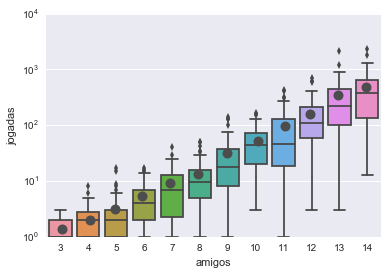

In [9]:
ax = sns.boxplot(x="amigos", y="jogadas", data=resultado)
# Add in points to show each observation
sns.stripplot(x="amigos", y="jogadas", data=media,
              jitter=True, size=10, color=".3", linewidth=0)

# Make the quantitative axis logarithmic
ax.set_yscale("log")